Nama : Syafiera Muraqabah
NPM  : 183112706450226
Data set : https://www.kaggle.com/yairhadad1/self-organizing-map/notebook 

Self organizing map
adalah jenis jaringan saraf tiruan (ANN) yang dilatih menggunakan pembelajaran tanpa pengawasan untuk menghasilkan dimensi rendah (biasanya dua dimensi). 
Setiap titik data dalam kumpulan data mengenali diri mereka sendiri dengan bersaing untuk representasi. Langkah-langkah pemetaan SOM dimulai dari inisialisasi vektor bobot. Dari sana vektor sampel dipilih secara acak dan peta vektor bobot dicari untuk menemukan bobot mana yang paling mewakili sampel tersebut. Setiap vektor bobot memiliki bobot tetangga yang dekat dengannya. Bobot yang dipilih dihargai dengan menjadi lebih seperti vektor sampel yang dipilih secara acak. Tetangga dengan bobot itu juga dihargai dengan bisa menjadi lebih seperti vektor sampel yang dipilih. Hal ini memungkinkan peta untuk tumbuh dan membentuk bentuk yang berbeda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# set seaborn
sns.set()

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
dataset = iris.drop(['Species','Id'],axis = 1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
cleanDataSet = pd.DataFrame(standard.fit_transform(dataset))
cleanDataSet.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8595 sha256=d343dcbb652a70af66ea13104c30bb43bd0e39efd632ee960ac52a098eeed34d
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [7]:
from minisom import MiniSom    
from matplotlib.gridspec import GridSpec

som = MiniSom(7, 7, 4, sigma=0.25,neighborhood_function='gaussian') 
som.train_random(cleanDataSet.to_numpy(), 30000) # trains the SOM with 100 iterations

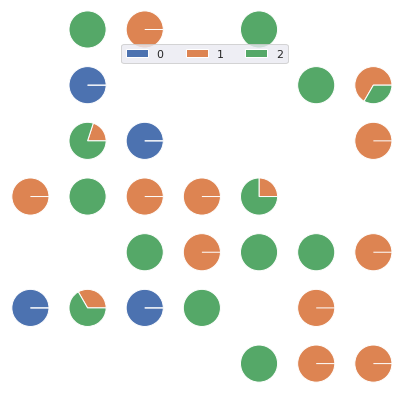

In [8]:
target = iris.Species.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)

plt.show()

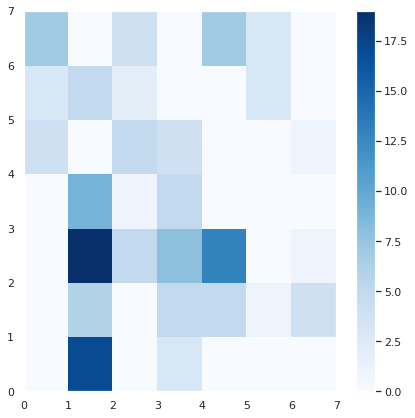

In [9]:
plt.figure(figsize=(7, 7))
frequencies = np.zeros((7, 7))
for position, values in som.win_map(cleanDataSet.to_numpy()).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()